working with the CIA World Factbook, a compenduium of statistics about all of the countries on Earth

import libraries

In [29]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
conn=sqlite3.connect("factbook.db")
q_tables="SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(q_tables, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [21]:
q_all="select * from facts limit 5"
pd.read_sql_query(q_all, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


Write a single query that returns the:
-  minimum population
-  maximum population
-  minimum population growth
-  maximum population growth

In [18]:
q_summary="select min(population), max(population), min(population_growth), max(population_growth) from facts"
pd.read_sql_query(q_summary, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [26]:
q_min_pop="select name from facts where population = (select min(population) from facts)"
pd.read_sql_query(q_min_pop, conn)

,name
0,Antarctica


In [25]:
q_max_pop="select name from facts where population = (select max(population) from facts)"
pd.read_sql_query(q_max_pop, conn)

,name
0,World


there is no recorded population on Antarctica and there is a line in the data that shows the total population of the world

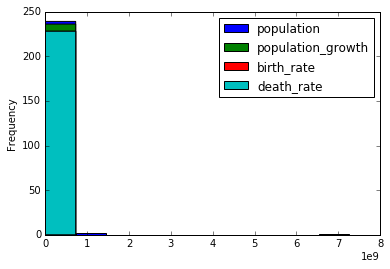

In [30]:
q_hist="select population, population_growth, birth_rate, death_rate from facts"
pd.read_sql_query(q_hist, conn).plot(kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff81954f1d0>,
      dtype=object)

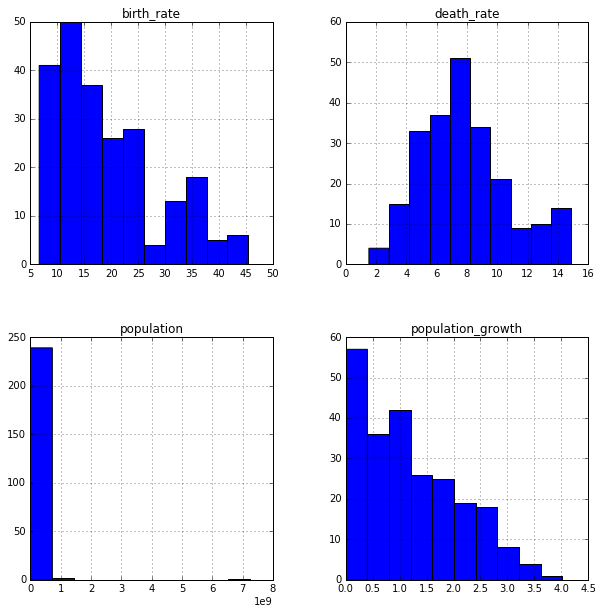

In [37]:
fig = plt.figure(figsize=(10,10))
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)
pd.read_sql_query(q_hist, conn).hist(ax=(ax_1, ax_2, ax_3, ax_4))

In [41]:
q_pop_density="select name, cast(population as float)/area density from facts limit 5"
pd.read_sql_query(q_pop_density, conn)

,name,density
0,Afghanistan,49.927697
1,Albania,105.373522
2,Algeria,16.602211
3,Andorra,182.863248
4,Angola,15.741841


In [43]:
q_water_land_ratio="select name, cast(area_water as float)/area_land water_land_ratio from facts order by water_land_ratio limit 5"
pd.read_sql_query(q_water_land_ratio, conn)

,name,water_land_ratio
0,Ethiopia,None
1,New Zealand,None
2,South Sudan,None
3,Sudan,None
4,Holy See (Vatican City),None


In [44]:
q7 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q7, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
